In [1]:
from dask.distributed import Client, progress
client = Client(dashboard_address=':5555')  # set up local cluster on your laptop
client

c:\Users\brand\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 5555 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 58538 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:58538/status,
Dashboard: http://127.0.0.1:58538/status,Workers: 4
Total threads: 12,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58539,Workers: 4
Dashboard: http://127.0.0.1:58538/status,Total threads: 12
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:58559,Total threads: 3
Dashboard: http://127.0.0.1:58561/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:58542,


In [2]:
import fsspec
fs = fsspec.filesystem('gs')
fs.ls('gs://gcp-public-data-arco-era5/ar')

['gcp-public-data-arco-era5/ar/1959-2022-1h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-1h-360x181_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-128x64_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-1440x721.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-240x121_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-512x256_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-6h-64x32_equiangular_with_poles_conservative.zarr',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg-chunk-1.zarr-v2',
 'gcp-public-data-arco-era5/ar/1959-2022-full_37-6h-0p25deg_der

In [3]:
import xarray as xr

ar_full_37_1h = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/1959-2022-6h-1440x721.zarr/'
    ,chunks={'time': '100MB'})

In [4]:
ar_full_37_1h

<xarray.Dataset>
Dimensions:                                           (time: 92044,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 13)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 50 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/38)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    ...                                                ...
    type_of_high_vegetation                           (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    wind_speed                                        (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>

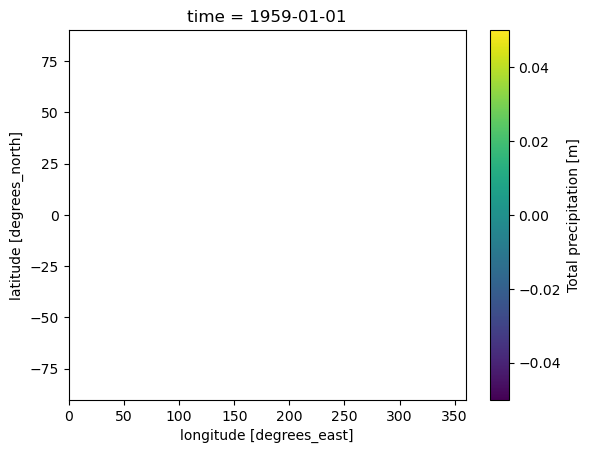

In [3]:
ar_full_37_1h['total_precipitation'].isel(time=0).plot()

In [10]:
import xarray as xr

lon_cent = 360-88.0
lat_cent = 40.0
delta = 5.0/2.0
delta_big = 40.0/2.0
#note that latitude decreases, so the slice limits must also decrease
#ds = ar_full_37_1h['total_precipitation'].sel(longitude=slice(lon_cent-delta,delta_big+delta),
#                                              latitude=slice(lat_cent+delta,lat_cent-delta)).chunk('auto')  
#box_ds = ds.mean(dim=['longitude','latitude'])

ds = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)

In [11]:
ds

<xarray.Dataset>
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 90.0...
  * level                                             (level) int64 1 2 ... 1000
  * longitude                                         (longitude) float32 0.0...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

In [20]:
tp = ds['total_precipitation'].sel(longitude=slice(lon_cent-delta,lon_cent+delta),
                                              latitude=slice(lat_cent+delta,lat_cent-delta),
                                              time=slice('2010-01-01 12:00','2020-12-31 12:00',24))
box_ds = tp.mean(dim=['longitude','latitude']).chunk('auto')

In [21]:
box_ds = box_ds.persist()

#to_netcdf('Champaign_box_precipitation.nc')

In [14]:
box_ds.to_netcdf('Champaign_precipitation_time_series.nc')

In [18]:
big_box_ds = ds['total_precipitation'].sel(longitude=slice(lon_cent-delta_big,lon_cent+delta_big),
                                              latitude=slice(lat_cent+delta_big,lat_cent-delta_big),
                                              time=slice('1981-01-01 12:00','2010-12-31 12:00',24))
#big_box_ds = tp.mean(dim=['longitude','latitude']).chunk('auto')
big_box_ds.to_netcdf('Big_box_precipitation_time_series.nc')

In [ ]:
big_box_ds.plot()

Task exception was never retrieved
future: <Task finished name='Task-1199836' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195246' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195223' coro=<Client._gather.<

KeyboardInterrupt: 

Task exception was never retrieved
future: <Task finished name='Task-1195248' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195433' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195064' coro=<Client._gather.<

Task exception was never retrieved
future: <Task finished name='Task-1195124' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195425' coro=<Client._gather.<locals>.wait() done, defined at /Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py:2208> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/snesbitt/mambaforge/envs/pythia/lib/python3.12/site-packages/distributed/client.py", line 2217, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-1195179' coro=<Client._gather.<

In [16]:
box_ds = xr.open_dataset('Champaign_precipitation_time_series.nc')

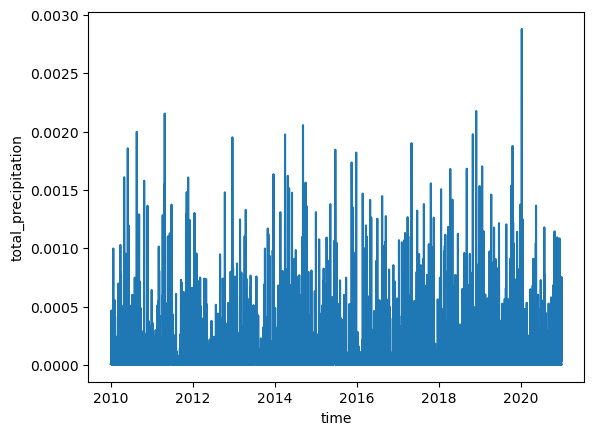

In [18]:
box_ds['total_precipitation'].plot()